## Градиентный спуск для Kernel trick

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import scipy.stats as sps
import seaborn as sns
sns.set()

Теперь реализуем проективный градиентный спуск

In [54]:
def projective_gradient_descent(function, 
                                x_0, 
                                alpha, 
                                derivative=None, 
                                projector=None, 
                                corner_condition=(lambda x: True),
                                precision=10 ** (-15),
                                silent=False):
    n = len(x_0)
    def get_gradient(function, x):
        eps = 10 ** (-8)
        result = np.array([.0] * n)
        for i in range(n):
            new_x = np.array([.0] * n)
            new_x[i] = eps
            new_x += x
            result[i] = (function(new_x) - function(x)) / eps
            
        return result
    
    if derivative is None:
        derivative = lambda x: get_gradient(function, x)
        
    prev_x = x_0
    it = 0
    while True:
        it += 1
        if projector is not None:
            next_x = projector(prev_x - alpha * derivative(prev_x))
            # print(f'x {prev_x}, gr {-derivative(prev_x)}, proj {projector(-derivative(prev_x))}, next {next_x}')
            
            last_a = alpha
            while not corner_condition(next_x):
                alpha /= 2
                next_x = projector(prev_x - alpha * derivative(prev_x))
                
            alpha = last_a
            if not silent:
                print(f'x {prev_x}, gr {-derivative(prev_x)}, nnp {prev_x - alpha * derivative(prev_x)}, next {next_x}')
        else:
            next_x = prev_x - alpha * derivative(prev_x)
            
            while not corner_condition(next_x):
                alpha /= 2
                next_x = prev_x - alpha * derivative(prev_x)
                
            
        #
        # print(abs(np.sum((prev_x - next_x) ** 2)), function(prev_x), derivative(prev_x))
        #
        if np.all(next_x == x_0):
            alpha /= 2
        
        if abs(np.sum((prev_x - next_x) ** 2)) < precision:
            break
        prev_x = next_x
            
    return prev_x, it
    

In [55]:
projective_gradient_descent(lambda x: -np.sin(x), 
                            np.array([0.5]), 
                            0.1,
                            corner_condition=(lambda x: x < 1))

(array([0.99999998]), 17)

Более сложная задача:
\begin{cases}
f = x^2 + y^2 \xrightarrow{} \min,\\
2x + y - 2 = 0.
\end{cases}

In [58]:
def projector(x):
    w = np.array([2, 1])
    b = np.array([1, 0])
    return x - w * np.sum(w * (x - b)) / np.sum(w * w)

projective_gradient_descent(lambda x: np.sum(x ** x),
                            np.array([0, 2]),
                            0.4,
                            derivative=(lambda x: 2 * x),
                            projector=projector)

x [0 2], gr [ 0 -4], nnp [0.  0.4], next [0.64 0.72]
x [0.64 0.72], gr [-1.28 -1.44], nnp [0.128 0.144], next [0.768 0.464]
x [0.768 0.464], gr [-1.536 -0.928], nnp [0.1536 0.0928], next [0.7936 0.4128]
x [0.7936 0.4128], gr [-1.5872 -0.8256], nnp [0.15872 0.08256], next [0.79872 0.40256]
x [0.79872 0.40256], gr [-1.59744 -0.80512], nnp [0.159744 0.080512], next [0.799744 0.400512]
x [0.799744 0.400512], gr [-1.599488 -0.801024], nnp [0.1599488 0.0801024], next [0.7999488 0.4001024]
x [0.7999488 0.4001024], gr [-1.5998976 -0.8002048], nnp [0.15998976 0.08002048], next [0.79998976 0.40002048]
x [0.79998976 0.40002048], gr [-1.59997952 -0.80004096], nnp [0.15999795 0.0800041 ], next [0.79999795 0.4000041 ]
x [0.79999795 0.4000041 ], gr [-1.5999959  -0.80000819], nnp [0.15999959 0.08000082], next [0.79999959 0.40000082]
x [0.79999959 0.40000082], gr [-1.59999918 -0.80000164], nnp [0.15999992 0.08000016], next [0.79999992 0.40000016]
x [0.79999992 0.40000016], gr [-1.59999984 -0.80000033],

(array([0.79999998, 0.40000003]), 12)

Задача со смешанным условием:
\begin{cases}
f = x^2 + y^2 \xrightarrow{} \min,\\
2x + y - 2 = 0, \\
x > \frac{1}{2}.
\end{cases}

In [41]:
projective_gradient_descent(lambda x: np.sum(x ** x),
                            np.array([0, 2]),
                            0.4,
                            derivative=(lambda x: 2 * x),
                            projector=projector,
                            corner_condition=(lambda x: x[1] > 0.5 ))

x [0 2], gr [ 0 -4], nnp [0.  0.4], next [0.64 0.72]
x [0.64 0.72], gr [-1.28 -1.44], nnp [0.128 0.144], next [0.704 0.592]
x [0.704 0.592], gr [-1.408 -1.184], nnp [0.1408 0.1184], next [0.7424 0.5152]
x [0.7424 0.5152], gr [-1.4848 -1.0304], nnp [0.14848 0.10304], next [0.74816 0.50368]
x [0.74816 0.50368], gr [-1.49632 -1.00736], nnp [0.149632 0.100736], next [0.749456 0.501088]
x [0.749456 0.501088], gr [-1.498912 -1.002176], nnp [0.1498912 0.1002176], next [0.7497719 0.5004562]
x [0.7497719 0.5004562], gr [-1.4995438 -1.0009124], nnp [0.14995438 0.10009124], next [0.74992886 0.50014227]
x [0.74992886 0.50014227], gr [-1.49985773 -1.00028455], nnp [0.14998577 0.10002845], next [0.74996798 0.50006404]
x [0.74996798 0.50006404], gr [-1.49993596 -1.00012808], nnp [0.1499936  0.10001281], next [0.74998752 0.50002495]
x [0.74998752 0.50002495], gr [-1.49997505 -1.0000499 ], nnp [0.1499975  0.10000499], next [0.74999729 0.50000541]
x [0.74999729 0.50000541], gr [-1.49999459 -1.00001083],

(array([0.74999998, 0.50000004]), 15)

Метод классификации, основанный на решённой оптимизационной задаче

In [42]:
import math
def predict_classificator(w, b, x):
    return np.sign(np.sum(w * x) - b)

Поместим решение задачи квадратичного программирования в следующий метод.

Напомню, что мы решаем
\begin{cases}
\sum \lambda_i - \frac{1}{2}\sum_i \sum_j \lambda_i \lambda_j c_i c_j \langle x_i, x_j\rangle \xrightarrow{} \max_{\lambda}, \\
\lambda_i \geq 0, \\
c_i \in \{-1, 1\} \\
\sum \lambda_i c_i = 0.
\end{cases}

Для быстрого вычисления функционала представим первое выражение в форме
$\sum \lambda_i - \frac{1}{2} \lambda^T H \lambda,$
где $H_{i, j} = c_i c_j \langle x_i, x_j \rangle$

Заметим, что $\nabla f(\lambda) = 1 - H \lambda$

Ограничение в нашей задаче можно представить в виде множества возможных значений $D = \{\lambda \in \mathbb{R}^n: \langle c, \lambda \rangle = 0, \forall i~\lambda_i \geq 0\}$. Определим проектор для метода проекции градиента

In [43]:
def D_projector(c, x):
    proj = x - c * np.sum(x * c) / len(x)

    return proj

def D_corner_condition(x):
    return np.all(x >= 0)

In [64]:
def solve_quadratic_progr(class_1, class_2, precision=10 ** (-15), silent=False):
    x = []
    c = []
    # prepare
    for elem in class_1:
        x.append(np.array(elem))
        c.append(-1)
        
    for elem in class_2:
        x.append(np.array(elem))
        c.append(1)
        
    x = np.array(x)
    c = np.array(c)
        
    n = len(x)
      
    # count H
    H = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            H[i][j] = c[i] * c[j] * np.sum(x[i] * x[j])
    
    def functional(H, lambd):        
        return np.sum(lambd) - 0.5 * lambd.T @ H.T @ lambd
    
    def functional_gradient(H, lambd):
        return np.ones(n) - H.T @ lambd 
    
    lambd_0 = D_projector(c, np.ones(n))
    if not silent:
        print('l0', lambd_0, ', c', c)
    
    #print(functional(H, np.linalg.inv(H) @ np.ones(n)), functional(H, lambd_0), functional(H, 2 * np.linalg.inv(H) @ np.ones(n)), functional(H, 0.5 * np.linalg.inv(H) @ np.ones(n)))
    
    # find min for -functional
    argmin, it = projective_gradient_descent(lambda l: -functional(H, l), 
                                         lambd_0, 
                                         0.5, 
                                         derivative=(lambda l: -1 * functional_gradient(H, l)),
                                         projector=(lambda l: D_projector(c, l)),
                                         corner_condition=D_corner_condition,
                                         precision=precision,
                                         silent=silent)
    
    w = np.sum([argmin[i] * c[i] * x[i] for i in range(n)], axis=0)
    b = 0
    for i in range(n):
        if argmin[i] != 0:
            b = np.sum(w * x[i]) + 1 / c[i]
    
    return w, b, it
    

Демонстрационный метод получения точек плоскости из $w, b$

In [46]:
def get_plane_x_y(w, b, left, right):
    x = np.linspace(left, right, 1000)
    y = (b - w[0] * x) / w[1]
    return x, y

ЭЭЭксперименты

In [47]:
sample_x = sps.norm(loc=0, scale=4).rvs(50)
sample_y = sps.norm(loc=0, scale=4).rvs(50)

In [48]:
set_1 = [[], []]
set_2 = [[], []]

for x, y in zip(sample_x, sample_y):
    if x - y >= 0:
        set_1[0].append(x)
        set_1[1].append(y - 1)
    else:
        set_2[0].append(x)
        set_2[1].append(y + 1)

In [49]:
class_1_linear = [np.array([x, y]) for x, y in zip(set_1[0], set_1[1])]
class_2_linear = [np.array([x, y]) for x, y in zip(set_2[0], set_2[1])]

In [51]:
w, b, it = solve_quadratic_progr(class_1_linear, class_2_linear)
it

l0 [1.16 1.16 1.16 1.16 1.16 1.16 1.16 1.16 1.16 1.16 1.16 1.16 1.16 1.16
 1.16 1.16 1.16 1.16 1.16 1.16 1.16 0.84 0.84 0.84 0.84 0.84 0.84 0.84
 0.84 0.84 0.84 0.84 0.84 0.84 0.84 0.84 0.84 0.84 0.84 0.84 0.84 0.84
 0.84 0.84 0.84 0.84 0.84 0.84 0.84 0.84] , c [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1]
x [1.16 1.16 1.16 1.16 1.16 1.16 1.16 1.16 1.16 1.16 1.16 1.16 1.16 1.16
 1.16 1.16 1.16 1.16 1.16 1.16 1.16 0.84 0.84 0.84 0.84 0.84 0.84 0.84
 0.84 0.84 0.84 0.84 0.84 0.84 0.84 0.84 0.84 0.84 0.84 0.84 0.84 0.84
 0.84 0.84 0.84 0.84 0.84 0.84 0.84 0.84], gr [ -453.25859664  -512.02752995  -804.19301314  -759.18806313
 -1053.55025703 -1066.7093762   -676.71056553  -933.50176521
  -283.79549681 -1034.52665998 -1021.53286656 -1119.85774735
  -476.64006412 -2093.88840243 -2145.02076731  -369.91529196
  -364.14433166  -313.39178598 -2517.4037197   -613.18240898
 -1279.27716983  -

15

[-59.30088124  76.41680789] 414.1479075415249


<Figure size 720x720 with 0 Axes>

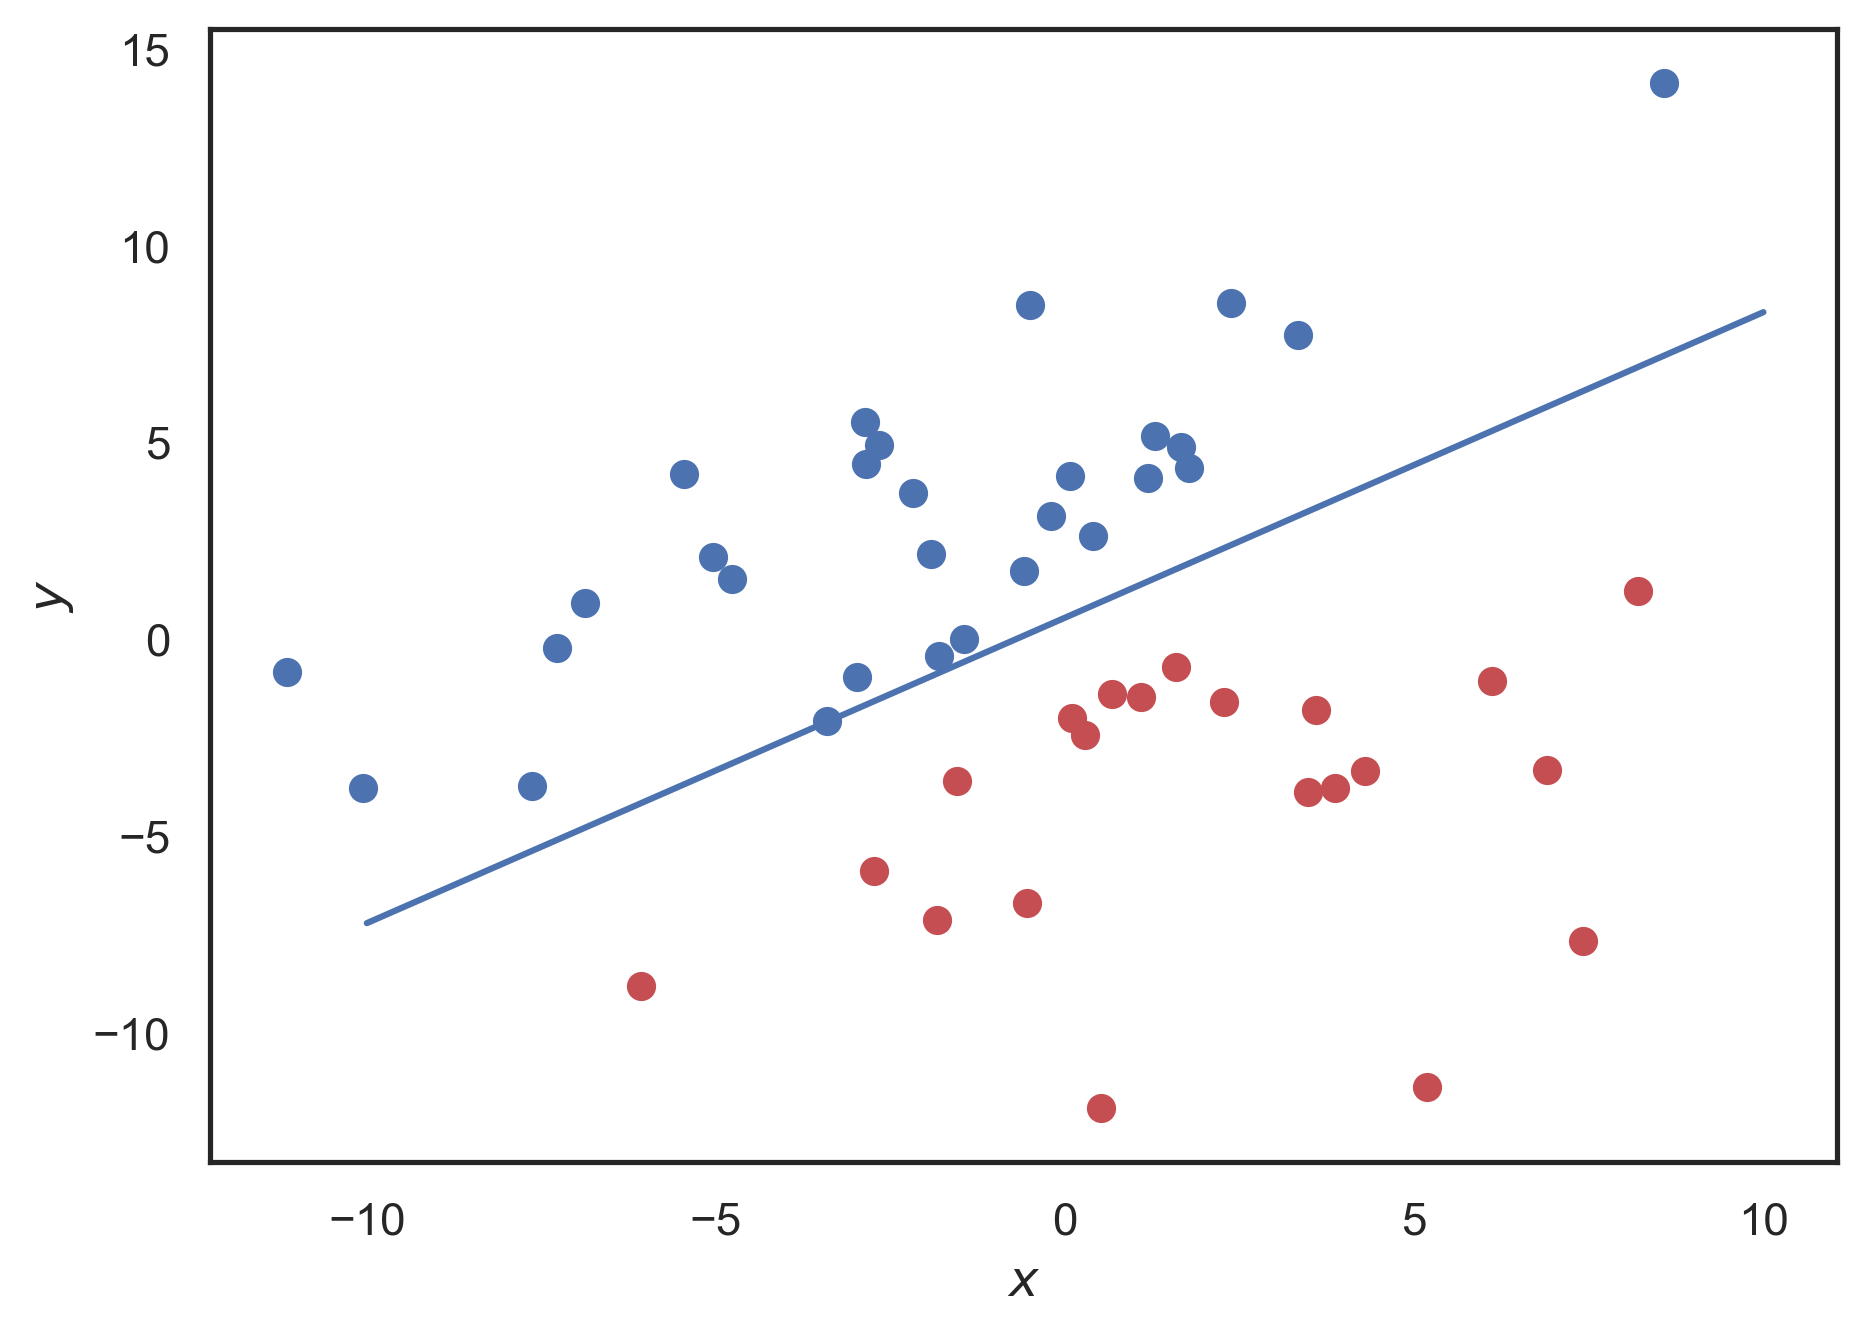

In [87]:
sns.set(style='white')
print(w, b)
plt.figure(figsize=(10, 10))
x, y = get_plane_x_y(w, b / 10, -10, 10)
plt.figure(figsize=(7, 5), dpi=300)
plt.plot(x, y)
plt.scatter(set_1[0], set_1[1], color='r')
plt.scatter(set_2[0], set_2[1], color='b')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

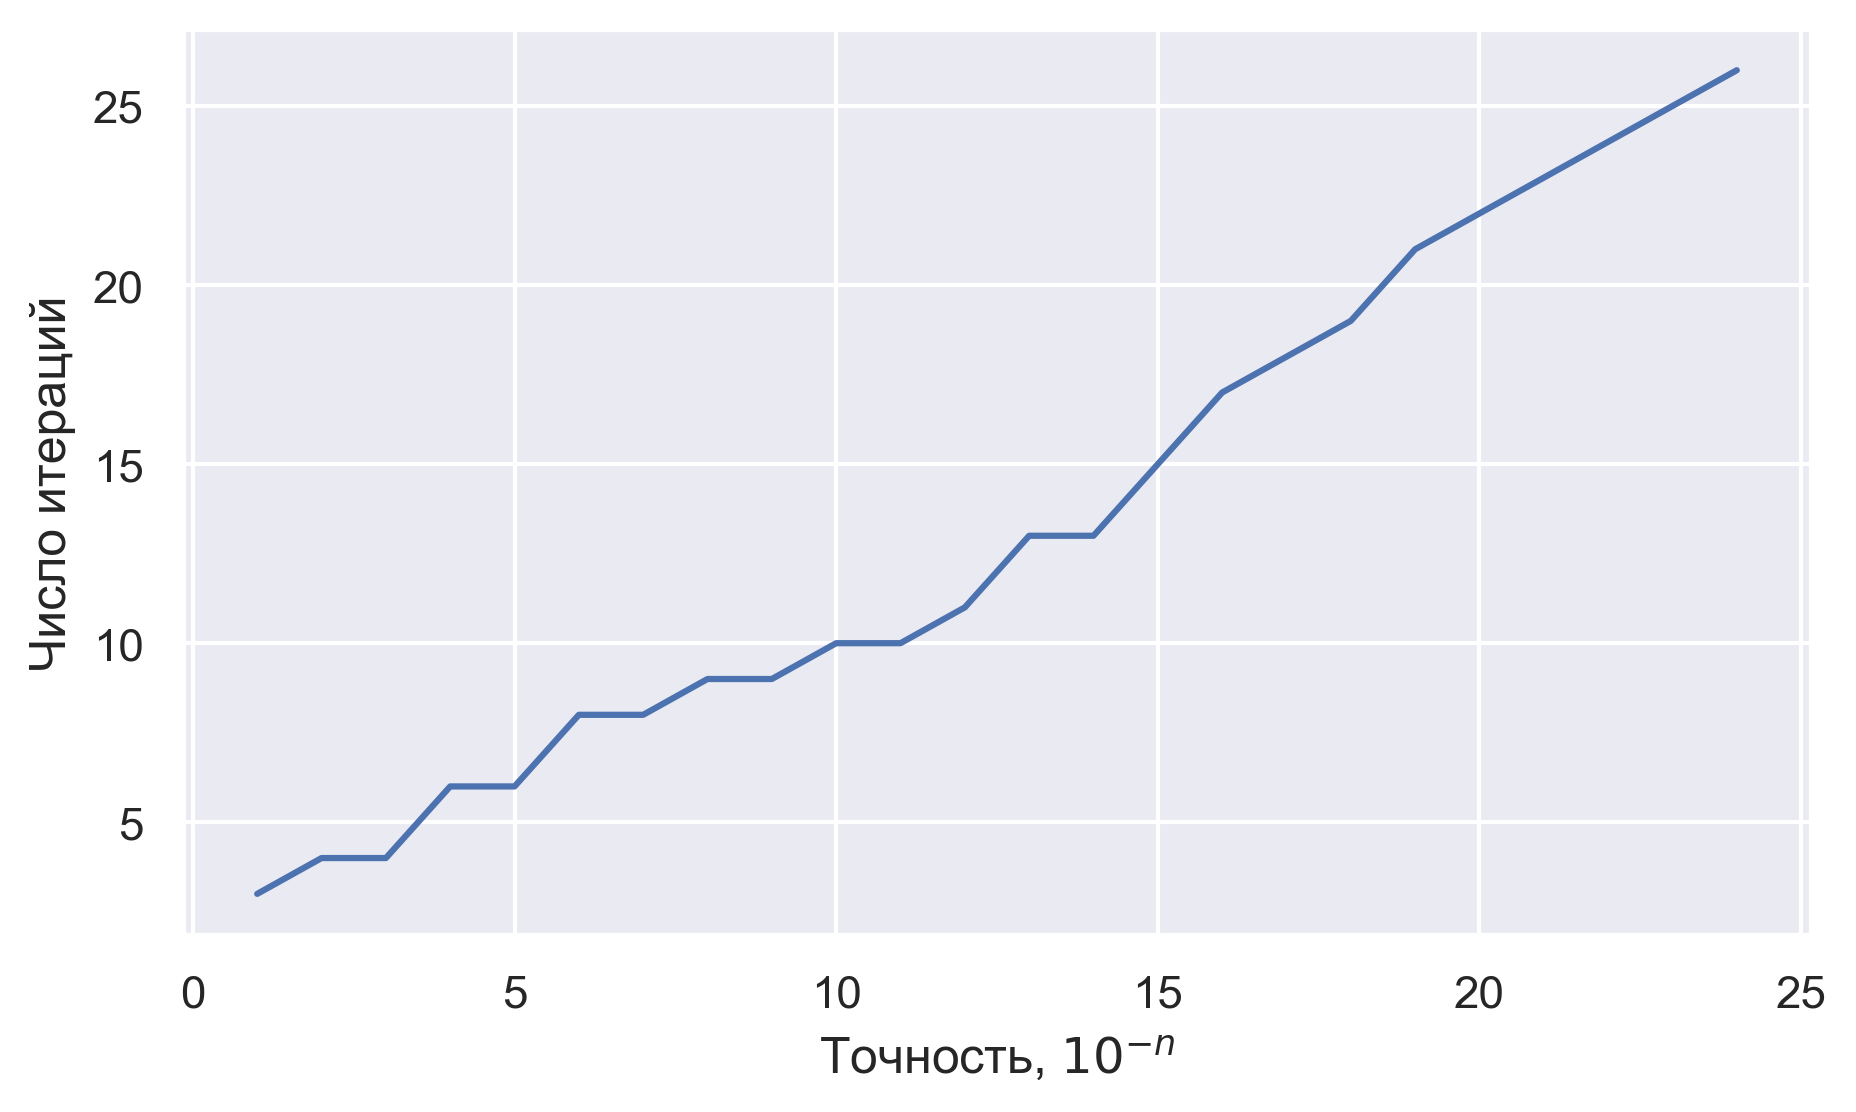

In [82]:
import matplotlib
iters = []
for i in range(1, 25):
    w, b, it = solve_quadratic_progr(class_1_linear, class_2_linear, precision=10 ** (-i), silent=True)
    iters.append(it)

plt.figure(figsize=(7, 4), dpi=300)
plt.plot(np.arange(1, 25), iters)
plt.xlabel('Точность, $10^{-n}$')
plt.ylabel('Число итераций')
plt.show()

In [104]:
x_s = sps.norm(loc=0, scale=4).rvs(1000)
y_s = sps.norm(loc=0, scale=4).rvs(1000)

In [105]:
s_1 = [[], []]
s_2 = [[], []]

for x, y in zip(x_s, y_s):
    if x ** 2 + y ** 2 >= 4:
        s_1[0].append(2 * x)
        s_1[1].append(2 * y)
    else:
        s_2[0].append(x)
        s_2[1].append(y)

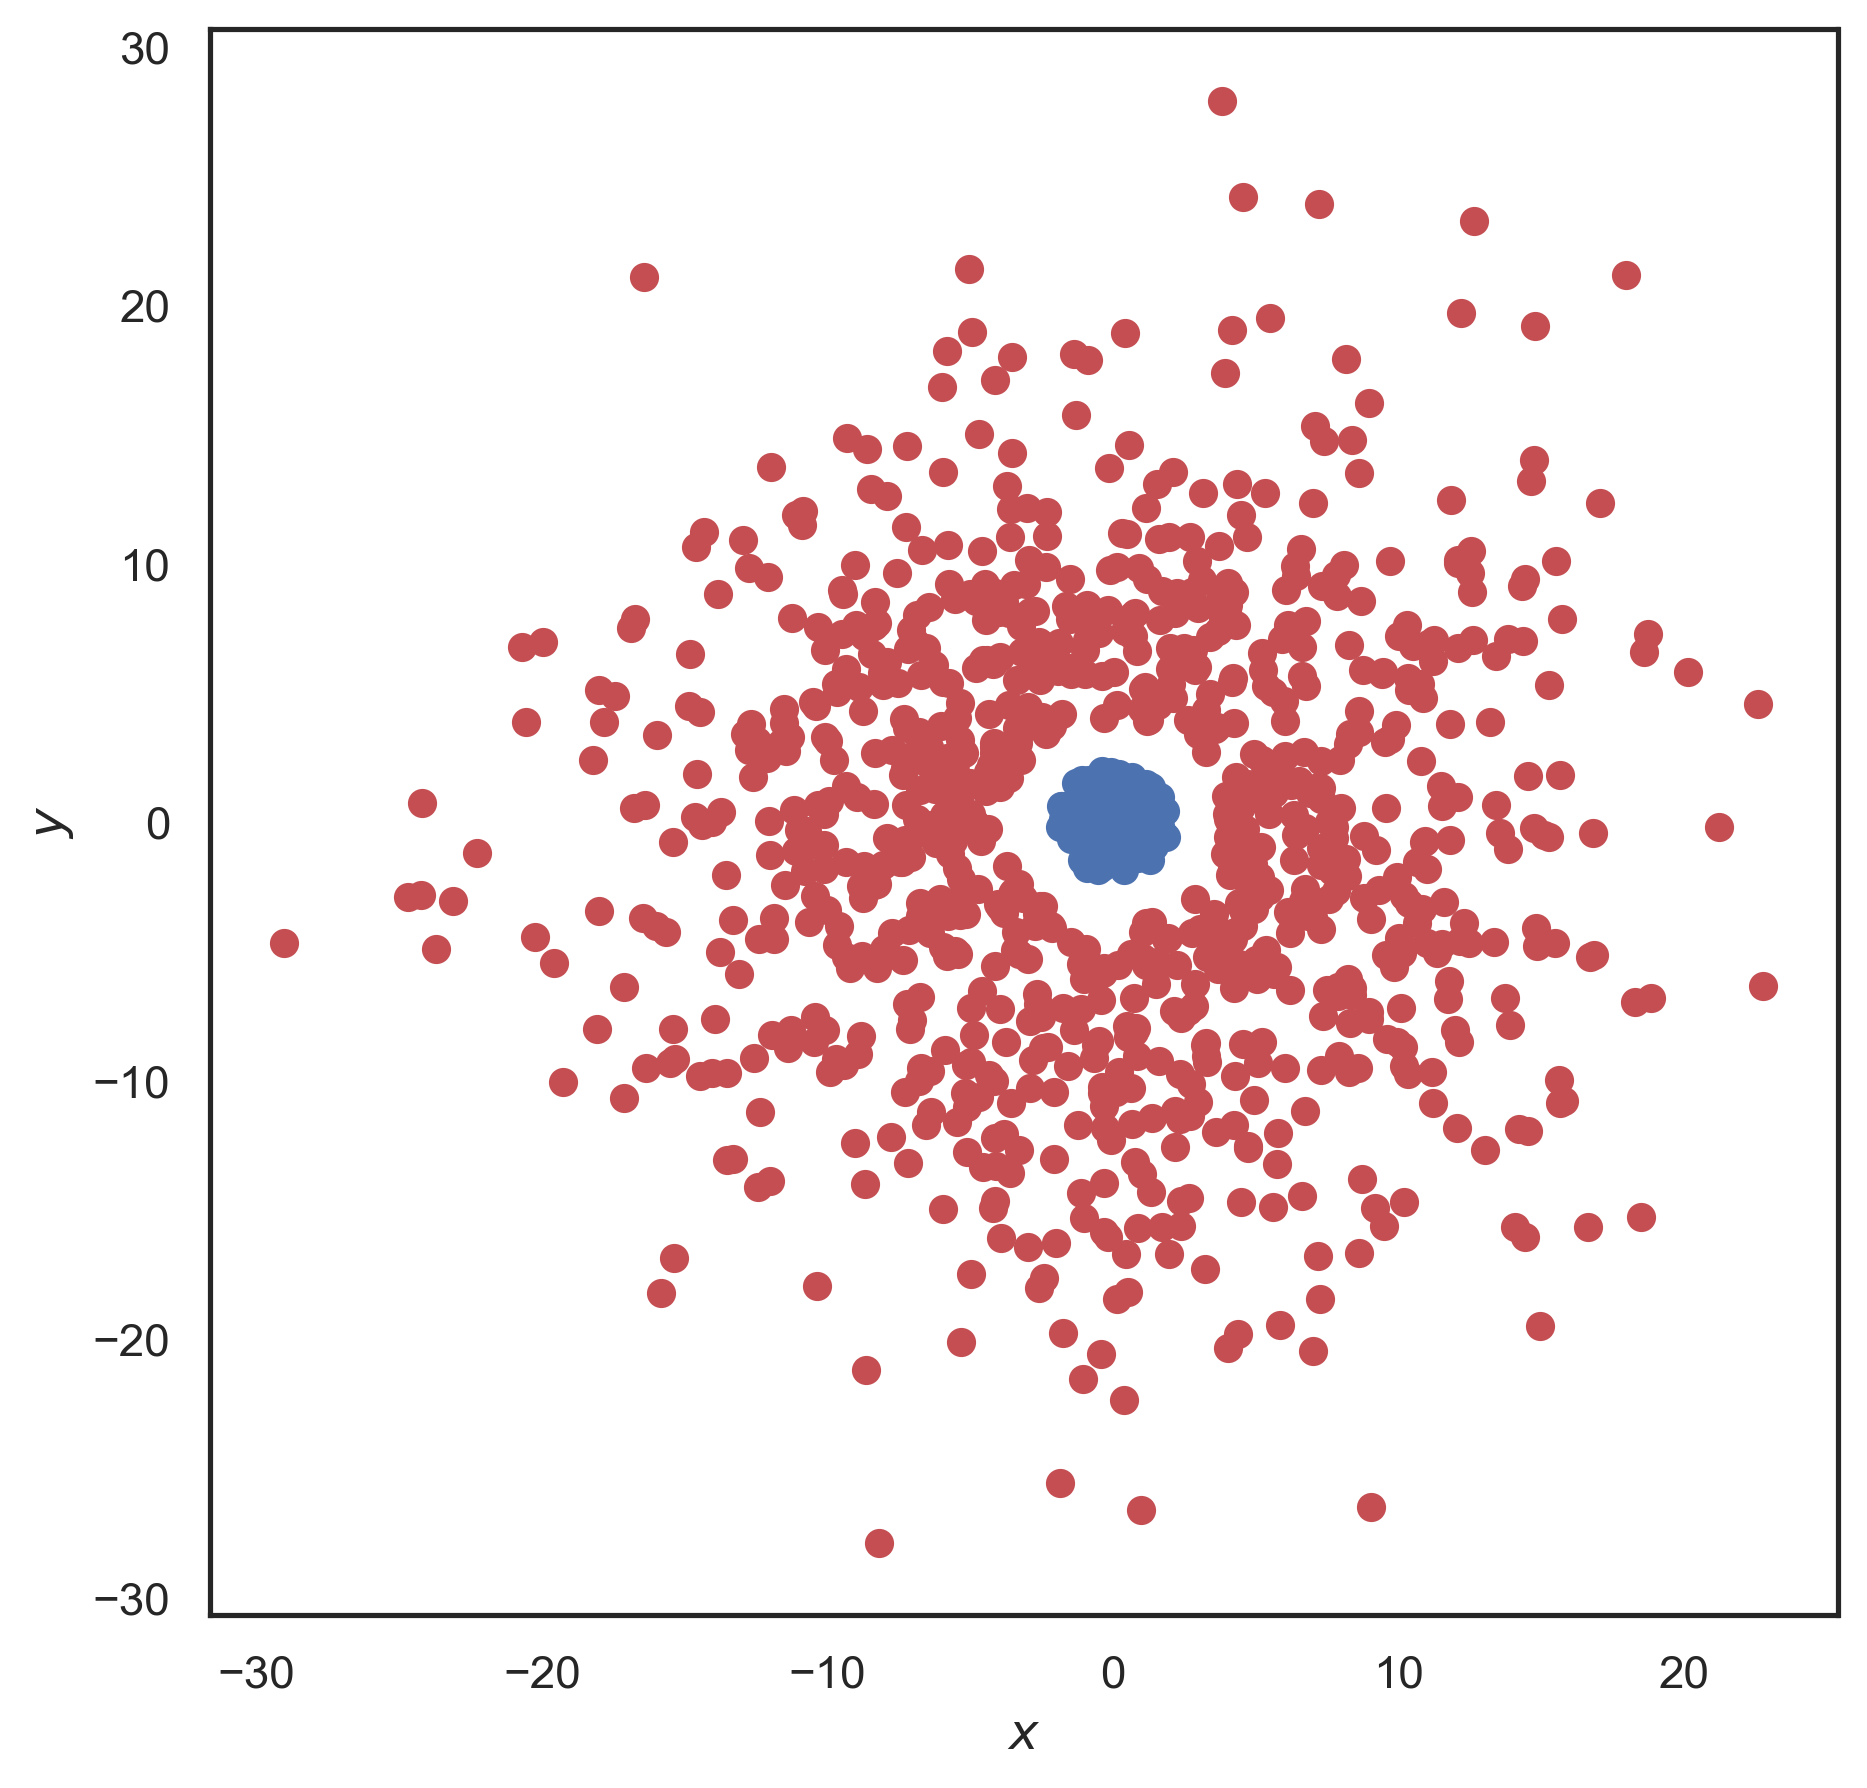

In [106]:
sns.set(style='white')
plt.figure(figsize=(7, 7), dpi=300)
plt.scatter(s_1[0], s_1[1], color='r')
plt.scatter(s_2[0], s_2[1], color='b')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

In [107]:
s_1 = np.array(s_1)
s_2 = np.array(s_2)

Под действием явной $\phi$ видим сепарабельность

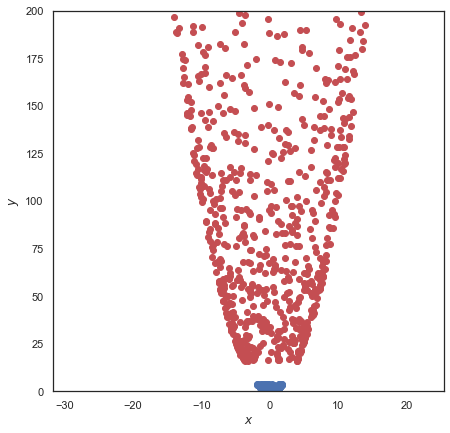

In [108]:
plt.figure(figsize=(7, 7))
plt.scatter(s_1[0], s_1[0] ** 2 + s_1[1] ** 2, color='r')
plt.scatter(s_2[0], s_2[0] ** 2 + s_2[1] ** 2, color='b')
plt.ylim(0, 200)
plt.ylabel('$y$')
plt.xlabel('$x$')
plt.show()

In [109]:
class_1_linear = [np.array([x, y]) for x, y in zip(s_1[0], s_1[0] ** 2 + s_1[1] ** 2)]
class_2_linear = [np.array([x, y]) for x, y in zip(set_2[0], s_2[0] ** 2 + s_2[1] ** 2)]


In [110]:
w, b, it = solve_quadratic_progr(class_1_linear, class_2_linear, silent=True)

[  -99.63222552 -6719.6950256 ] -14354.14193906225


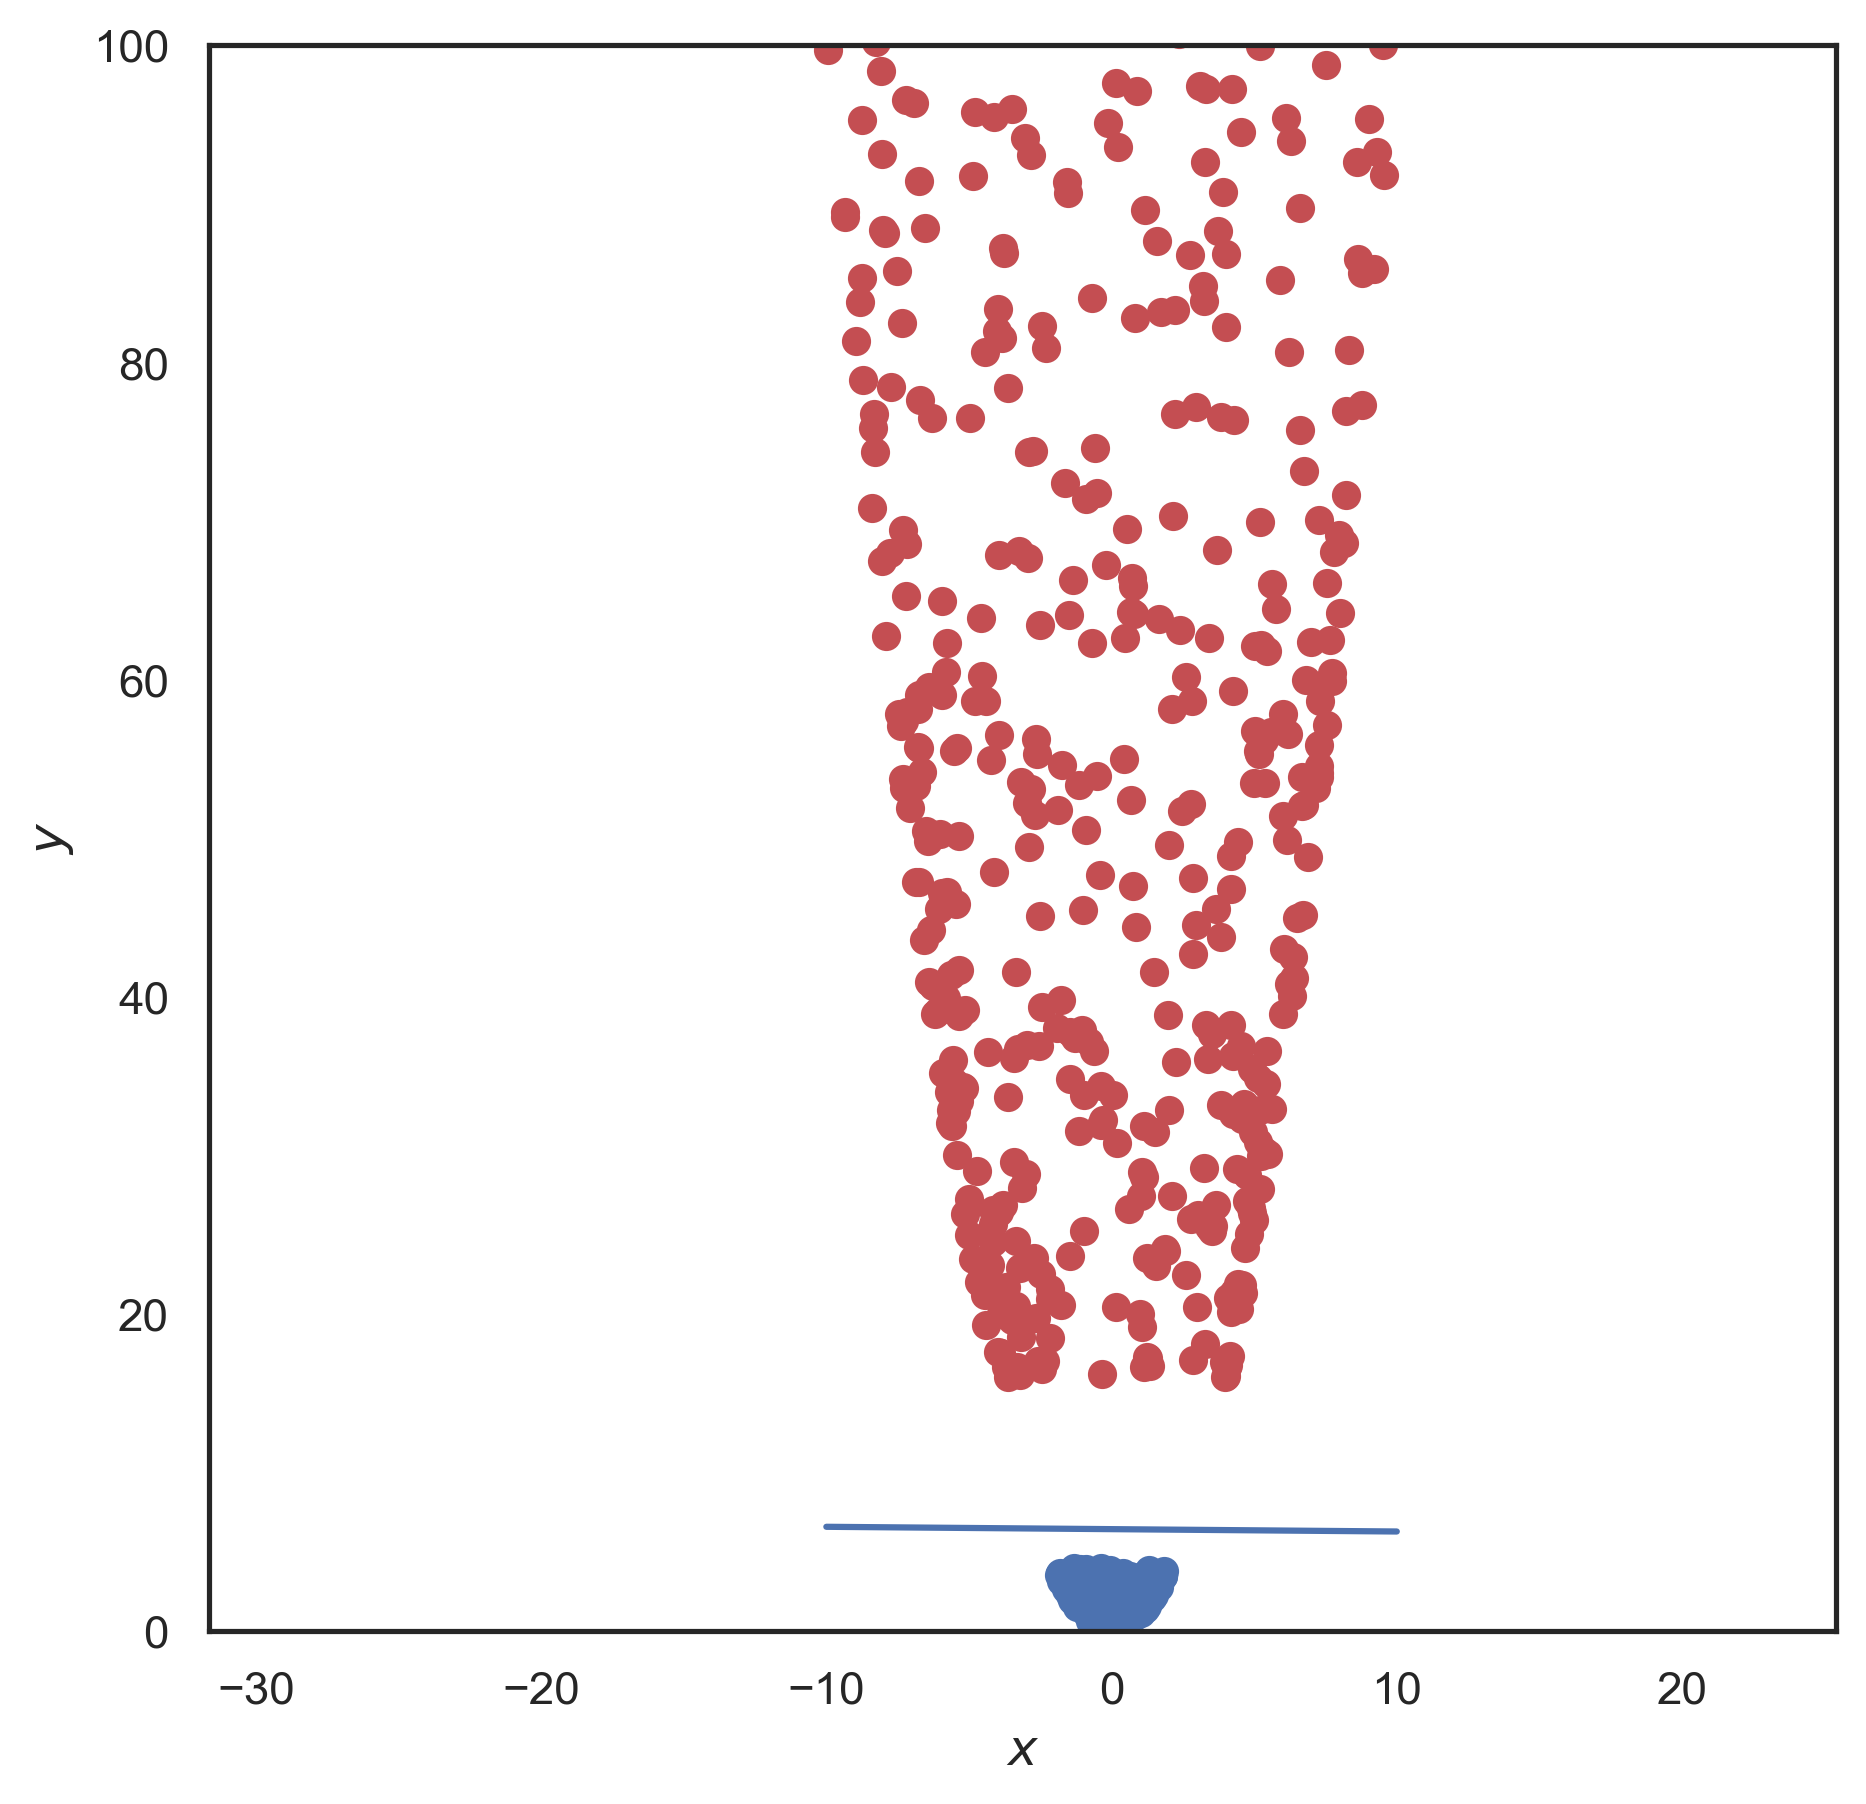

In [112]:
print(w, b)
plt.figure(figsize=(7, 7), dpi=300)
x, y = get_plane_x_y(w, b * 3, -10, 10)
plt.plot(x, y)
plt.ylim(0, 100)
plt.scatter(s_1[0], s_1[0] ** 2 + s_1[1] ** 2, color='r')
plt.scatter(s_2[0], s_2[0] ** 2 + s_2[1] ** 2, color='b')
plt.ylabel('$y$')
plt.xlabel('$x$')
plt.show()

In [114]:
import time
times = []
for sz in range(100, 2000, 100):
    print(sz)
    start = time.time()
    x_s = sps.norm(loc=0, scale=4).rvs(sz)
    y_s = sps.norm(loc=0, scale=4).rvs(sz)
    s_1 = [[], []]
    s_2 = [[], []]

    for x, y in zip(x_s, y_s):
        if x ** 2 + y ** 2 >= 4:
            s_1[0].append(2 * x)
            s_1[1].append(2 * y)
        else:
            s_2[0].append(x)
            s_2[1].append(y)
    s_1 = np.array(s_1)
    s_2 = np.array(s_2)
    class_1_linear = [np.array([x, y]) for x, y in zip(s_1[0], s_1[0] ** 2 + s_1[1] ** 2)]
    class_2_linear = [np.array([x, y]) for x, y in zip(set_2[0], s_2[0] ** 2 + s_2[1] ** 2)]
    w, b, it = solve_quadratic_progr(class_1_linear, class_2_linear, silent=True)
    end = time.time()
    times.append(end - start)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900


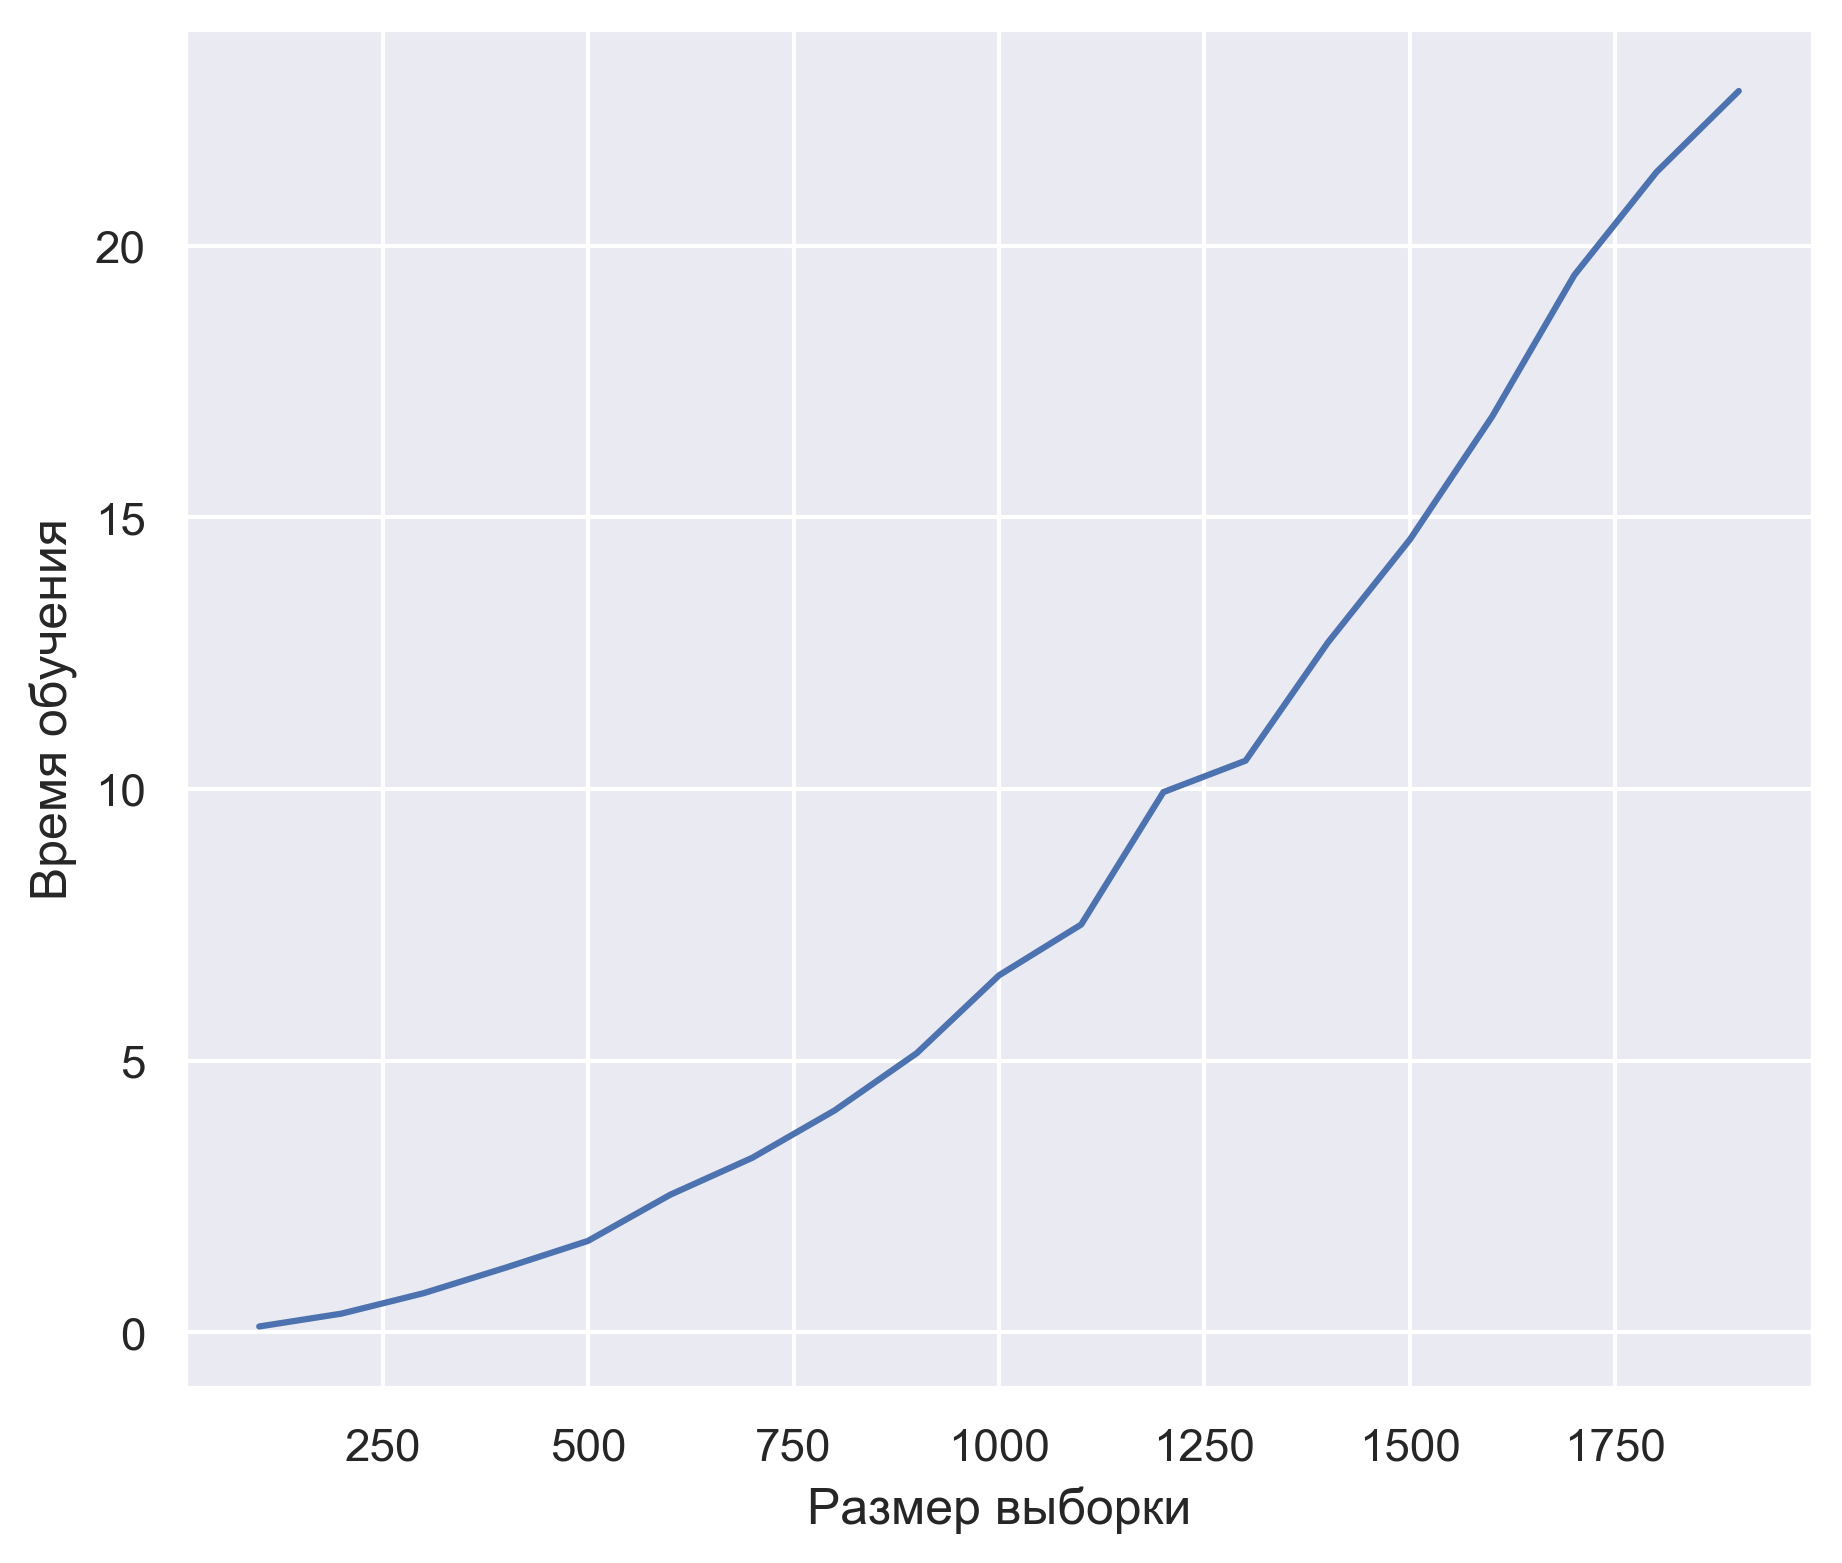

In [115]:
sns.set(style='darkgrid')
plt.figure(figsize=(7, 6), dpi=300)
plt.plot(np.arange(100, 2000, 100), times)
plt.xlabel('Размер выборки')
plt.ylabel('Время обучения')
plt.show()